# Machine Learning with a Library

### Introduction

In the last number of lessons, we have been built a simple linear regression machine learning.  We did so using the three components of any machine learning algorithm: first with choosing a prediction model, then fitting the model, and finally using the model to predict future data.

1. Our **prediction model** was simply a line, or a function, that given an input predicted an output.  In our example of basketball shooting, given a shooting angle, the model predicted a distance.  

2. We **fit** the model by comparing our model against the actual data.  We do this by calculating the difference between our actual data and the value that our model predicts -- this difference is called the error.  Then we square each of those errors and add up the these squared errors.  

3. Now we can **predict** new outputs with our fitted model.  For example, we could predict amounts for temperatures that we never saw before.

### Using a machine learning library

Now wouldn't it be nice if, instead of writing these algorithms from scratch, we could use a tool to do these for us?  Well we can.

<img src="./scikitlearn.png" >

Scikit learn is an excellent tool for running machine learning algorithms.  Let's get going.

Our first step, of course, is to install the library.

In [2]:
!pip install sklearn

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


> Press shift + enter to ensure that the library is installed.

Then we do the following.

In [1]:
import sklearn

Now that we have this library, let's import the linear regression model.

## Going through our three steps

Now that we have downloaded the `scikitlearn` library, and imported the library it is time to follow our three step process of (1) creating an initial model, (2) fitting the model and (3) then fitting the model to make new predictions.

### 1. Creating an initial model

In our introduction to machine learning lesson, we created an initial model simply by writing a function that takes an input and predicts an output.  

In [2]:
def predicted_distance(angle):
    return 12 + 5*angle 

Now when working with scikitlearn we also create an initial model, but we do so by using the `LinearRegression` function from the scikitlearn library.

So first we import the `LinearRegression` function.

In [3]:
from sklearn.linear_model import LinearRegression

And now we can create our initial model.

In [4]:
linear_regression = LinearRegression()

This model is fairly abstract at this point.  And admittedly difficult to understand.  But the big takeaway is that it's pretty similar to a dictionary.  As you can see, it has key value pairs just like a dictionary does.  

In [9]:
linear_regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

It's ok that we don't understand what these key value pairs mean, we will in time.  Right now let's focus on the fact that we were able to build an initial linear regression model with the lines:

```python
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
```

And now that we have an initial model, we are ready to move onto step 2: fitting our model to the data.

### 2. Fit the model with the actual data

Now that we have initialized our model with the code `linear_regression = LinearRegression()`, it is now time to pass through some data into this model so what we can fit the model.  In the last lesson, we saw how we can fit the model by choosing parameters that minimize the error of our function.

Here we do the same thing, and we do so by passing the data into our model, so that the linear regression model can then adjust the parameters to fit to this data.

| temperature        | actual customers           
| ------------- |:-------------:| 
|    80       | 120 | 
|    65        | 100 | 
|    50        | 85 | 
|    70        | 100 | 
|    60        | 90 | 


Now remember that the shooting angles are the inputs and that each angle leads to an output of a distance.  Ok, so we may like to simply pass through these inputs and outputs as two lists to our model.  And out model has a `fit` method to do precisely that.

In [17]:
temperatures = [80, 65, 50, 70, 60]
amounts = [120, 100, 85, 100, 90]

However `scikitlearn` requires our input data to be in a specific format.  It wants us to organize the data associated with our inpepdendent variables like so:

In [11]:
inputs = [[80], [65], [50], [70], [60]]

The output data can stay the same.

In [12]:
customers = [120, 100, 85, 100, 90]

> We'll explain why our input data needs to be in this format in a couple of lessons.  For now, let's just go with it.

Ok, now that we know the format for our data, the next thing to do is to fit our linear model to the data.  We do this by using the `fit` method on our linear model and passing through the data in the proper format.

In [13]:
# nested list for the inputs
inputs = [
    [80], 
    [65], 
    [50], 
    [70], 
    [60]
]

# single list for the outputs
outputs = [120, 100, 85, 100, 90]

linear_regression.fit(inputs, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 3. Viewing our trained model

Believe it or not with that line there at the end, we have fit our model to our data.  Here we'll prove it.  Remember in our simple linear regression model we have two components: our intercept and our coefficient.  

Let's start with our intercept.

In [14]:
linear_regression.intercept_

24.25

Now for our coefficient.

In [15]:
linear_regression.coef_

array([1.15])

Remember that these numbers fit into our general formula of $y = mx + b$ where our $m$ is our coefficient and $b$ is our intercept.  So really what we learned is that when we fit a model to our data, we found a best fit line of $y = 1.15x + 24.5 $. 

Let's plot this our data and our line as we did previously.

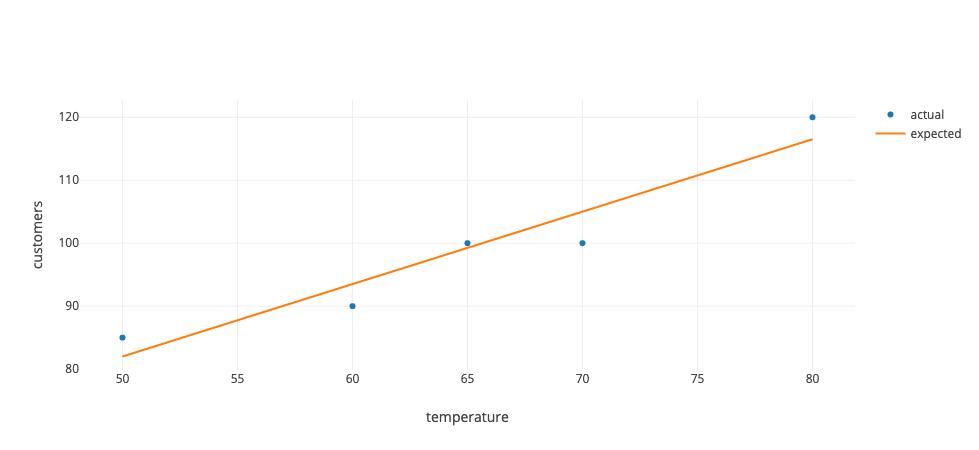

In [18]:
from graph import trace_values, plot
data_trace = trace_values(temperatures, amounts, name = 'actual')
predicted_amounts = list(map(lambda temperature: 1.15*temperature + 24.5,temperatures))
model_trace = trace_values(temperatures, predicted_amounts, name = 'expected', mode = 'lines')

layout = {'yaxis': {'title': 'customers'}, 'xaxis': {'title': 'temperature'}}
plot([data_trace, model_trace], layout = layout)

It looks like our model did a pretty good job.

### 4. Predicting new distances

Now to plot the line above, what we did was to plug in different values into our formula, and then plot this as a line.

In [20]:
predicted_amounts = list(map(lambda temperature: 1.15*temperature + 24.5,temperatures))

temperatures 
# [80, 65, 50, 70, 60]
predicted_amounts
# [116.5, 99.25, 82.0, 105.0, 93.5]

[116.5, 99.25, 82.0, 105.0, 93.5]

Not bad at all.  Of course, `scikitlearn` has a built in method that allows us to see the outputs of our model.  We can pass through the temperatures we would like predictions for.  Once again we use a nested list for our inputs.

In [22]:
inputs = [
    [80],
    [65],
    [50],
    [70],
    [60]
]

linear_regression.predict(inputs)

array([116.25,  99.  ,  81.75, 104.75,  93.25])

And notice that our predictions match what we calculated by hand above.  And we can pass through whichever inputs we like and our trained model will predict the customers for us.  For example, say we see the forecase for next week has temperatures of 92, 87 and 89 degrees.  Let's see how many customers we can expect.

In [23]:
inputs = [
    [92],
    [87],
    [89]
]

linear_regression.predict(inputs)

array([130.05, 124.3 , 126.6 ])

### Summary

In this lesson, we saw how to use the scikitlearn library to fit a machine learning model and make new predictions with our fitted model. 



We do so using similar steps to what we saw in our introduction to machine learning lesson.

1. Create an initial model
2. Fit the model to data
3. Use the fitted model to make new predictions

We can translate these steps into code with the following:

In [8]:
# import libraries
import sklearn
from sklearn.linear_model import LinearRegression

# 1. Create an initial model
linear_regression = LinearRegression()

# 2. Fit the model to data
linear_regression.fit(inputs, outputs)

# 3. Use the fitted model to make new predictions
linear_regression.predict(inputs)

The other thing to remember is that if we want to see the numbers behind these new predictions, we can see them by calling the corresponding methods.